### **Please submit all parts of the Module 2 homework in 1 notebook.**

**Please enter your name and email in the textbox below, and state whether or not you are planning to take the next available Module 2 Assessment.  This way, we will make sure you receive feedback on the assignment as soon as possible.**

*Name*:

*Email*:

*I plan to take the next available Module 2 Assessment*: Yes/No

# Module 2, Part 1

Please complete this assignment in a Jupyter Notebook.  

Each of you is assigned to a Track numbered from 1 to 7.  Your Track will posted on Canvas and will be the same across all homeworks.  Members of your group will be assigned to the same track so that you can more easily help each other with assignment questions.

Please submit all parts of the Module 2 assignment as 1 notebook in the Canvas assignment for Module 2 ("Module 2 Homework).

# Section 0: Basic Setup & Initialization 



### Setting up your environment  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns


Now we authenticate a Google Drive client to mount your drive and access the data file.

**Make sure to follow the interactive instructions.**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing the Iris data

In [3]:
from sklearn import datasets

iris = datasets.load_iris()

# Section 1: Experiments with the KNN Classifier using the Iris dataset

### 1\. Standardize the iris dataset data

In [4]:
from sklearn.preprocessing import StandardScaler

X, y = iris['data'], iris['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaled_df = pd.DataFrame(X_scaled)
print(scaled_df)

            0         1         2         3
0   -0.900681  1.019004 -1.340227 -1.315444
1   -1.143017 -0.131979 -1.340227 -1.315444
2   -1.385353  0.328414 -1.397064 -1.315444
3   -1.506521  0.098217 -1.283389 -1.315444
4   -1.021849  1.249201 -1.340227 -1.315444
..        ...       ...       ...       ...
145  1.038005 -0.131979  0.819596  1.448832
146  0.553333 -1.282963  0.705921  0.922303
147  0.795669 -0.131979  0.819596  1.053935
148  0.432165  0.788808  0.933271  1.448832
149  0.068662 -0.131979  0.762758  0.790671

[150 rows x 4 columns]


### 2\. Split the standardized dataset intro training set and test set 

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33)

### 3\. Now split the data into training set and test set first, and then standardize 

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4\. Is the approach in 3 better or worse than doing 1 & 2? Explain why.



## GridSearchCV experiments 




Run the following code to load the KNN and Grid Search library functions

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

### 5\. Use the get_params() function to see what parameters you can set for a KNN classifier

In [8]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


### 6\. Run GridSearchCV on the KNN classifier applied to the iris dataset, using the following parameters values **and timing the execution of the function** (%time):


*   weights: ['uniform','distance'] \
*   leaf_size = [5,10,15,20,50] \
*   n_neighbors = [5,10,20,50] \
*   Use 'accuracy' as a scoring metric

In [9]:
# Train your model using the train data
%time

params = {'weights': ['uniform', 'distance'],
                   'leaf_size': [5, 10, 15, 20, 50], 
                   'n_neighbors': [5, 10, 20, 50]
                  }
gs = GridSearchCV(KNeighborsClassifier(), params, scoring='accuracy')
gs.fit(X_train_scaled, y_train)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 12.6 µs


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [5, 10, 15, 20, 50],
                         'n_neighbors': [5, 10, 20, 50],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

### 7\. What parameter combinations did the Randomized Search actually try?

In [10]:
gs.get_params()

{'cv': None,
 'error_score': nan,
 'estimator': KNeighborsClassifier(),
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'n_jobs': None,
 'param_grid': {'leaf_size': [5, 10, 15, 20, 50],
  'n_neighbors': [5, 10, 20, 50],
  'weights': ['uniform', 'distance']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'accuracy',
 'verbose': 0}

### 8\. Print/output the best Accuracy Score achievable based on the experiment in 6 above.

In [11]:
gs.best_score_

0.96

### 9\. Print/output the model parameters that result in the best "accuracy" score (according to GridSearchCV)

In [14]:
gs.best_estimator_.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(leaf_size=5, n_neighbors=20, weights='distance')>

### 10\. What is the **prediction** Accuracy of the model with the best training accuracy score?

In [13]:
from sklearn.metrics import accuracy_score
preds = gs.predict(X_test_scaled)
print(accuracy_score(y_test, preds))

1.0


### 11\. Plot the confusion matrix for the predictions (of the best performing model)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[18,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 18]])

## RandomizedSearchCV Experiments 

Run the cell below in order to import that library function for Randomized Search

In [16]:
from sklearn.model_selection import RandomizedSearchCV


### 12\. Run RandomizedSearchCV on the KNN classifier applied to the iris dataset, using the following parameters values **and timing the execution of the function** (%time):


*   weights: ['uniform','distance'] \
*   leaf_size = [5,10,15,20,50] \
*   n_neighbors = [5,10,20,50] \
*   n_iter = 3 (this parameter controls how many experiments are run, i.e., how many combinations of parameter values total) \
*   Use 'accuracy' as a scoring metric

In [17]:
%time

params = {'weights': ['uniform', 'distance'],
                   'leaf_size': [5, 10, 15, 20, 50], 
                   'n_neighbors': [5, 10, 20, 50]
                  }

rs = RandomizedSearchCV(KNeighborsClassifier(), params, cv=10, n_iter=3, scoring='accuracy')
rs.fit(X_train_scaled, y_train)



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_iter=3,
                   param_distributions={'leaf_size': [5, 10, 15, 20, 50],
                                        'n_neighbors': [5, 10, 20, 50],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

### 13\. What is the **prediction** Accuracy of the model with the best training accuracy?

In [18]:
from sklearn.metrics import accuracy_score
preds = rs.predict(X_test_scaled)
print(accuracy_score(y_test, preds))

1.0


### 14\.  Comment on the differences in accuracy and/or execution time between Grid Search & Randomized Search.

# Section 2: Expertiments with KNN using the Diabetest Dataset

Run the code below to load the mini_diabetes dataset (update the directory to the location of the dataset).

In [26]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module 2/mini_diabetes_data.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)

In [27]:
df.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,255490,170,42.0,24.199083,0,2,0,170.2,14,1,...,242.389041,232.699125,0,0,0,0,0,0,0,0
1,157498,161,50.0,39.820844,0,2,0,163.0,0,1,...,242.389041,232.699125,0,0,0,0,0,0,0,0
2,188549,33,77.0,27.215126,0,2,0,154.9,4,2,...,242.389041,232.699125,0,0,0,0,0,0,0,0
3,187313,17,49.0,30.863036,1,5,1,163.0,13,2,...,242.389041,232.699125,0,0,0,0,0,0,0,0
4,259144,159,54.0,23.661272,0,2,1,177.8,15,1,...,242.389041,232.699125,0,0,0,0,0,0,0,0


### 1\. Create training set and test set, and standardize the data

In [28]:
y = df['diabetes_mellitus']
X = df.drop('diabetes_mellitus',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



### 2\. Perform KNN using GridSearchCV or RandomizedSearchCV on the standardized dataset

In [29]:
%time

params = {'weights': ['uniform', 'distance'],
                   'leaf_size': [5, 10, 15, 20, 50], 
                   'n_neighbors': [5, 10, 20, 50]
                  }

rs = GridSearchCV(KNeighborsClassifier(), params, cv=5, scoring='accuracy')
rs.fit(X_train_scaled, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [5, 10, 15, 20, 50],
                         'n_neighbors': [5, 10, 20, 50],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

### 3\. What is the **prediction** accuracy of the best model you have found using GridSearchCV/RandomizeSearchCV on the training set?



In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix
preds = rs.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, preds))
print('CM:', confusion_matrix(y_test, preds))

Accuracy: 0.7895545314900153
CM: [[1990   42]
 [ 506   66]]


### 4\. Get the prediction probabilities for the target class 

In [31]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
probs = knn.predict_proba(X_test)
pred = knn.predict(X_test)
probs

array([[0.72, 0.28],
       [0.64, 0.36],
       [0.8 , 0.2 ],
       ...,
       [0.8 , 0.2 ],
       [0.88, 0.12],
       [0.7 , 0.3 ]])

### 5\.  Plot the precision-recall curve   

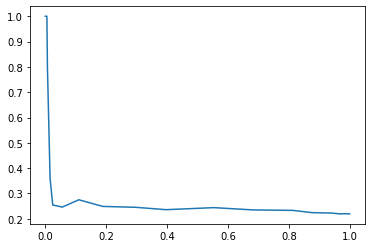

In [32]:
from sklearn.metrics import precision_recall_curve
y_scores = probs[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
plt.plot(recall, precision)

### 7\.  Plot the ROC curve

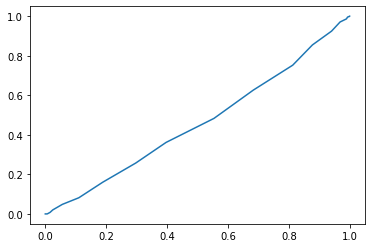

In [33]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.plot(tpr, fpr)

### 8\. Find the ROC AUC Score  

In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_scores)

0.5392999593910027

### 9\. Plot the confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, preds)

array([[1990,   42],
       [ 506,   66]])

### 10\.  Add any observations that you have about the results you got in questions 5-9 